# **Analyzing the Overall Liquidity Profile of XRP**
*Samarth Bahukhandi*

XRP is a digital asset developed by **Ripple Labs Inc.** to streamline and reduce the cost of **cross-border payments** for financial institutions. It functions as the native cryptocurrency of the XRP Ledger, a blockchain designed for fast and scalable financial transactions. The total supply of XRP is capped at **100 billion coins**, with a significant portion pre-mined and controlled through escrow to manage distribution

Read More:
[Whitepaper](https://whitepaper.io/document/1/ripple-whitepaper) | [Website](https://ripple.com/solutions/cross-border-payments/)

We will explore the key factors and metrics influencing XRP's liquidity across various exchanges.

In [15]:
# Download the Historical Price, Market Capitalization & Total Volume for XRP
# available in CSV from Coingecko (DATA till 07 August 2024)

import pandas as pd
data = pd.read_csv("xrp-usd-max.csv")

data.rename(columns = {"snapped_at":"Date", "price": "Price"}, inplace = True)
data.Date.dtypes


dtype('O')

In [16]:
data.head()

,Date,Price,market_cap,total_volume,Unnamed: 4,Unnamed: 5
0,04-08-2013,0.005874,45921034.0,0.0,NaN,NaN
1,05-08-2013,0.005653,44191247.0,0.0,NaN,NaN
2,06-08-2013,0.004669,36500633.0,0.0,NaN,NaN
3,07-08-2013,0.004486,35071445.0,0.0,NaN,NaN
4,08-08-2013,0.004196,32800191.0,0.0,NaN,NaN


In [17]:
# Transforming the dataset

data = pd.DataFrame(data)
data['Date'] = pd.to_datetime(data["Date"], format='%d-%m-%Y')

In [18]:
#Analyzing the 1-Year Historical Price of XRP

data_2023 = data[data['Date'] > pd.to_datetime('01-01-2023')]
data_mean = data_2023['Price'].mean()
data_mean

0.5255804664657534

**1. HISTORICAL PRICE ANALYSIS (XRP USD)**

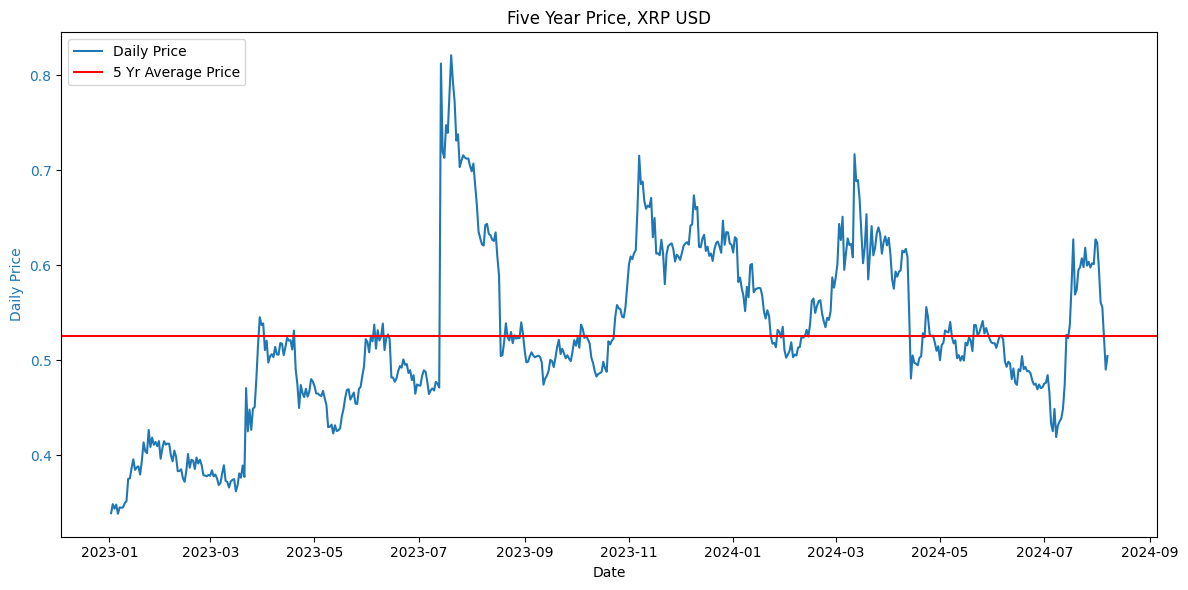

In [19]:
# Historical (Five Year) Price of XRP USD (CoinGecko)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Price
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Price', color='tab:blue')
ax1.plot(data_2023['Date'], data_2023['Price'], color='tab:blue', label='Daily Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

#Visualizing the average price of digital asset
plt.axhline(y=np.nanmean(data_2023.Price), color = 'red', label = '5 Yr Average Price')

# Title and Legends
plt.title('Five Year Price, XRP USD')
ax1.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


# **Analysis:**

Over the past year, XRP has exhibited notable price momentum, culminating in a **peak of $0.82** in July 2023. Despite these gains, the cryptocurrency has experienced significant **price fluctuations**, characteristic of the crypto market’s inherent volatility. The standard deviation of XRP’s returns over the past year stands at **8.84%**, reflecting substantial variability in its price movements.

Such elevated volatility suggests that XRP faces challenges related to liquidity.

**2. SENTIMENT ANALYSIS**

**Major News & Events**

XRP has experienced substantial price swings, **driven largely by regulatory scrutiny and ongoing legal battles** with authorities. The asset's price movements have historically been heavily influenced by market sentiment. Consequently, news and events related to XRP play a critical role in shaping its liquidity :

- July 2023: [Ripple’s XRP Token Surges 96% After Partial Victory in SEC Lawsuit](https://www.coindesk.com/markets/2023/07/13/ripples-xrp-token-surges-28-after-court-rules-xrp-sales-arent-investment-contracts/)
- August 2024: [XRP Jumps 17%, Beating Bitcoin Gains, as Ripple-SEC Case Ends: Trading volumes nearly tripled and open interest on XRP-tracked futures jumped $200 million in the past 24 hours](https://www.coindesk.com/markets/2024/08/08/xrp-jumps-17-beating-bitcoin-gains-as-ripple-sec-case-ends/)

**3. MARKET REPUTATION**

XRP, with a circulating supply of **55.43 billion** out of a maximum total of **100 billion XRP**, ranks as the **5th largest cryptocurrency** in the Layer 1 sector.

**Launched in 2012** by Chris Larsen, Jed McCaleb, and Arthur Britto, XRP was conceived to revolutionize financial systems by providing a decentralized real-time gross settlement system, currency exchange, and remittance network.

Currently, XRP is listed on **118 cryptocurrency exchanges**, underscoring its extensive market presence. This listing across major crypto exchanges indicates **a high level of trading activity** and **investor confidence**. Such broad accessibility enhances XRP’s liquidity and market stability. Additionally, the longevity and established reputation of XRP contribute to its ability to attract significant investment pools, reinforcing its position within the cryptocurrency ecosystem.

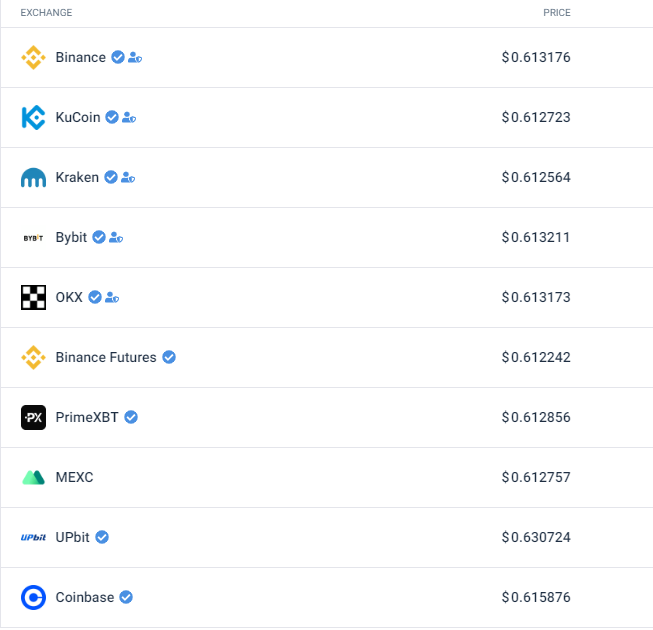

*captured as on 09 Aug 2024

**4. BID-ASK SPREAD**

*a. MODEL DEVELOPED WITH RANDOM PRICES*

- Random numbers have been generated for Bid Price, Ask Price, Bid Quantity and Ask Quantity for a period of 30 days with hourly frequency

---



In [20]:
# Building a Bid Ask Spread Model with
import pandas as pd
import numpy as np
import datetime

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
num_days = 30
num_intervals_per_day = 24  # hourly intervals

# Generate date range
dates = pd.date_range(start=datetime.datetime.now() - pd.DateOffset(days=num_days), periods=num_days * num_intervals_per_day, freq='H')

# Generate random bid and ask data
data = {
    'Timestamp': dates,
    'Bid Price': np.round(np.random.uniform(0.5100, 0.5400, size=num_days * num_intervals_per_day), 4),
    'Bid Quantity': np.random.randint(100, 1000, size=num_days * num_intervals_per_day),
    'Ask Price': np.round(np.random.uniform(0.5600, 0.6000, size=num_days * num_intervals_per_day), 4),
    'Ask Quantity': np.random.randint(100, 1000, size=num_days * num_intervals_per_day)
}

df = pd.DataFrame(data)

df["Bid-Ask Spread"] = df["Ask Price"] - df['Bid Price']

print(df.head())

                   Timestamp  Bid Price  Bid Quantity  Ask Price  \
0 2024-07-10 15:38:04.609211     0.5265           206     0.5852   
1 2024-07-10 16:38:04.609211     0.5315           572     0.5999   
2 2024-07-10 17:38:04.609211     0.5281           313     0.5995   
3 2024-07-10 18:38:04.609211     0.5263           384     0.5841   
4 2024-07-10 19:38:04.609211     0.5227           926     0.5651   

   Ask Quantity  Bid-Ask Spread  
0           679          0.0587  
1           902          0.0684  
2           525          0.0714  
3           881          0.0578  
4           995          0.0424  


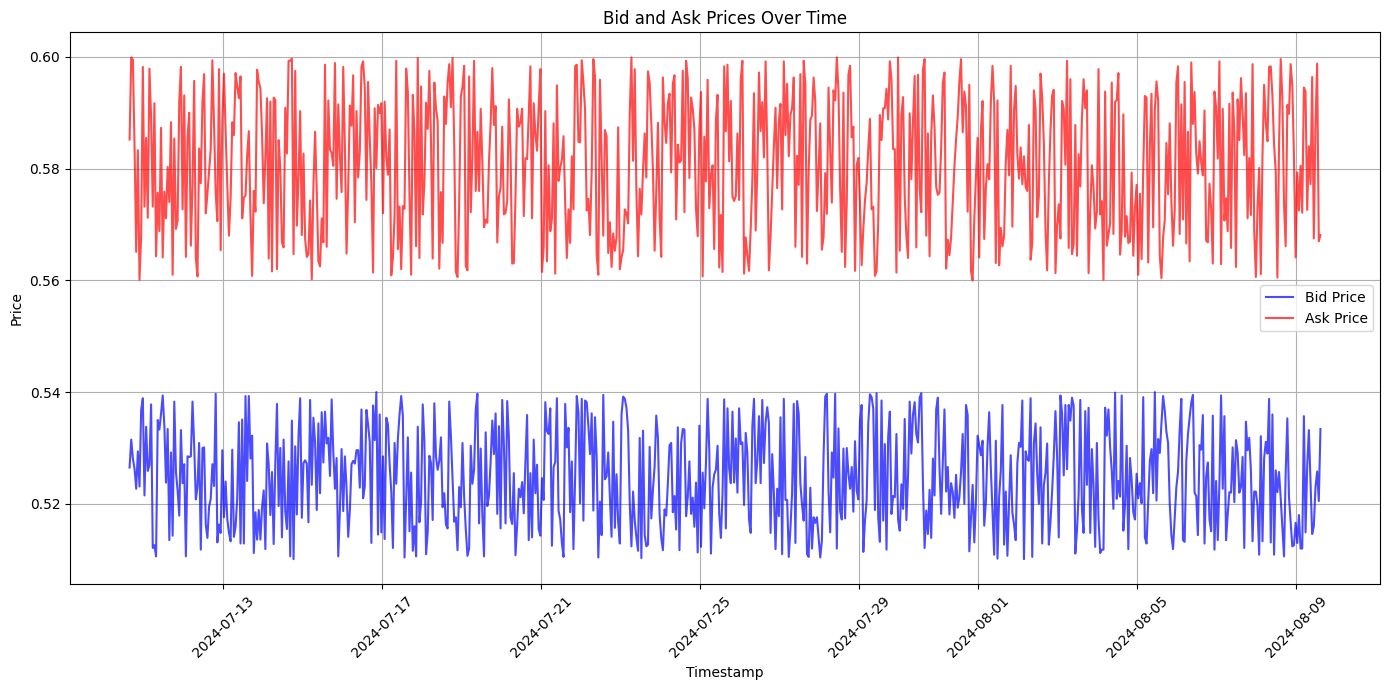

In [21]:
# Graphing the bid price and ask price for XRP on a graph

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

# Plot bid prices
plt.plot(df['Timestamp'], df['Bid Price'], label='Bid Price', color='blue', alpha=0.7)

# Plot ask prices
plt.plot(df['Timestamp'], df['Ask Price'], label='Ask Price', color='red', alpha=0.7)

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Bid and Ask Prices Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

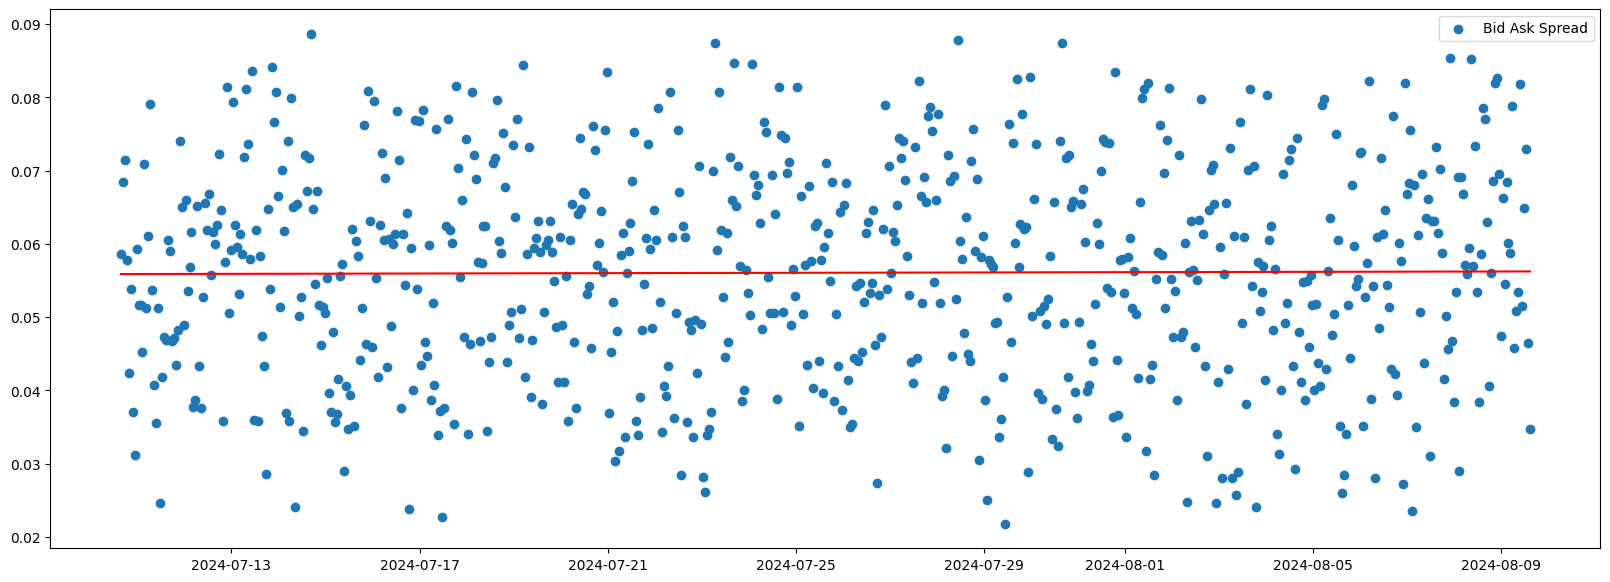

In [22]:
# Analyzing the Bid-Ask Spread of XRP

df['Timestamp_Numeric'] = df['Timestamp'].astype(np.int64) // 10**9
plt.figure(figsize = (20,7))
plt.scatter(df["Timestamp"], df["Bid-Ask Spread"], label = "Bid Ask Spread")

# Use the numerical timestamp values for polyfit
m,b = np.polyfit(df["Timestamp_Numeric"], df["Bid-Ask Spread"], 1)

plt.plot(df["Timestamp"], m*df["Timestamp_Numeric"] + b, color = "red") # Use the numerical values here as well
plt.legend()
plt.show()

In [23]:
df['Bid-Ask Spread'].mean()

0.05607416666666666

# **Analysis:**

The model analysis for the past 30 days indicates that the **average bid-ask spread** for XRP has been approximately **$0.056**, suggesting relatively **stable liquidity**. Despite this, a simple linear regression analysis of the bid-ask spread does not reveal a discernible downward trend. This **flat regression line** implies that there has **not been a significant increase in liquidity** over this period. In other words, the absence of a decreasing trend in the bid-ask spread suggests that XRP’s liquidity remains steady rather than experiencing a notable surge

Overall, XRP enjoys **a strong orderbook with a tight bid-ask spread** averaging around $0.056

**5. TRADING VOLUME**

a. Price-Volume Data for XRP for last 30 days - CoinGecko

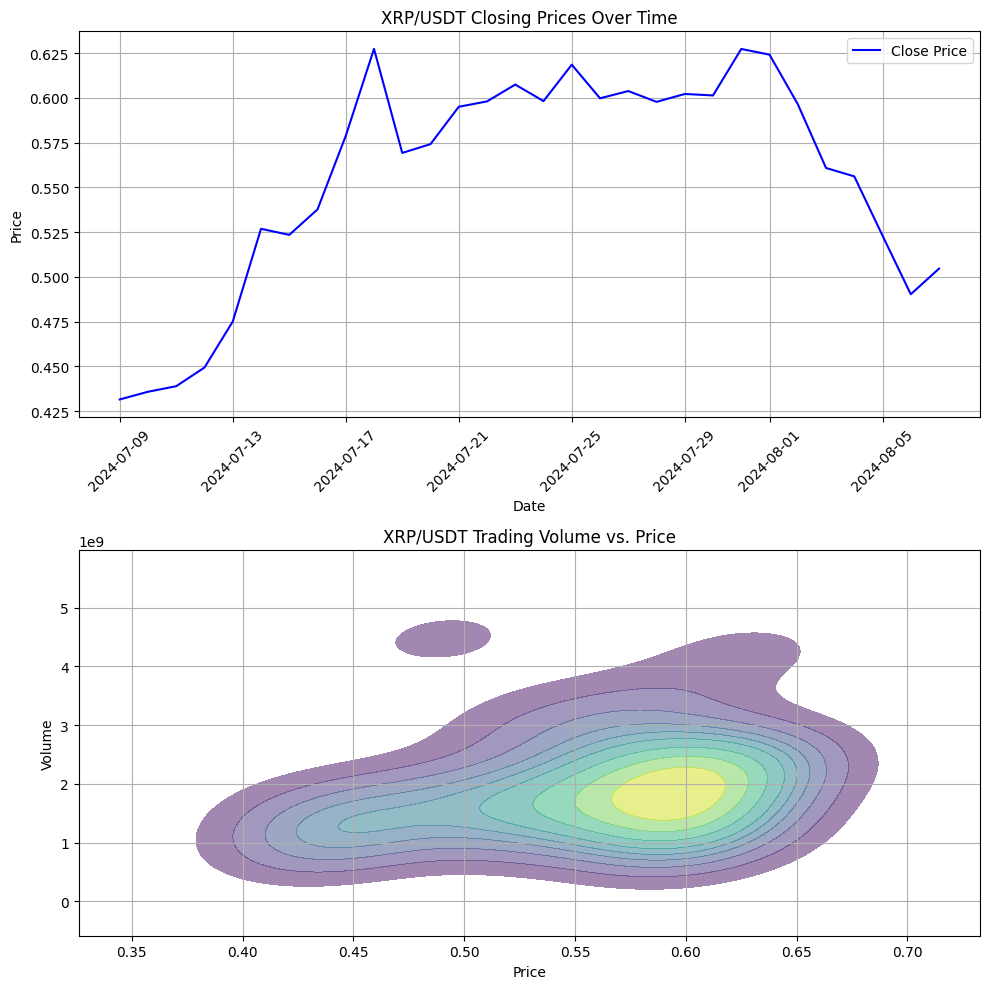

In [24]:
plt.figure(figsize=(10, 10))

# Building the last 30 days dataframe
data_30day = data_2023.tail(30)

# Plot closing prices on the left
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(data_30day["Date"], data_30day["Price"], color='blue', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XRP/USDT Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Create the second plot: Volume vs. Price
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
import seaborn as sns
sns.kdeplot(data=data_30day, x='Price', y='total_volume', cmap='viridis', fill=True, thresh=0.1, levels=10, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Volume')
plt.title('XRP/USDT Trading Volume vs. Price')
plt.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

#**Analysis**

This chart is crucial for understanding the XRP asset's behavior over the past month. It highlights significant **price volatility**, largely driven by **ongoing legal proceedings**.
However, an examination of the **price-volume data** reveals that trading activity is predominantly clustered around the **\$0.5700** - **\$0.610**. This concentration suggests that most traders are focusing their activities within this price band, reflecting a **key area of market interest** and potential support or resistance

b. Trading Volume Comparision across major digital Assets

*- We analyze the past 30 day trading volume across major digital assets including XRP, Bitcoin, Solana & Ethereum*

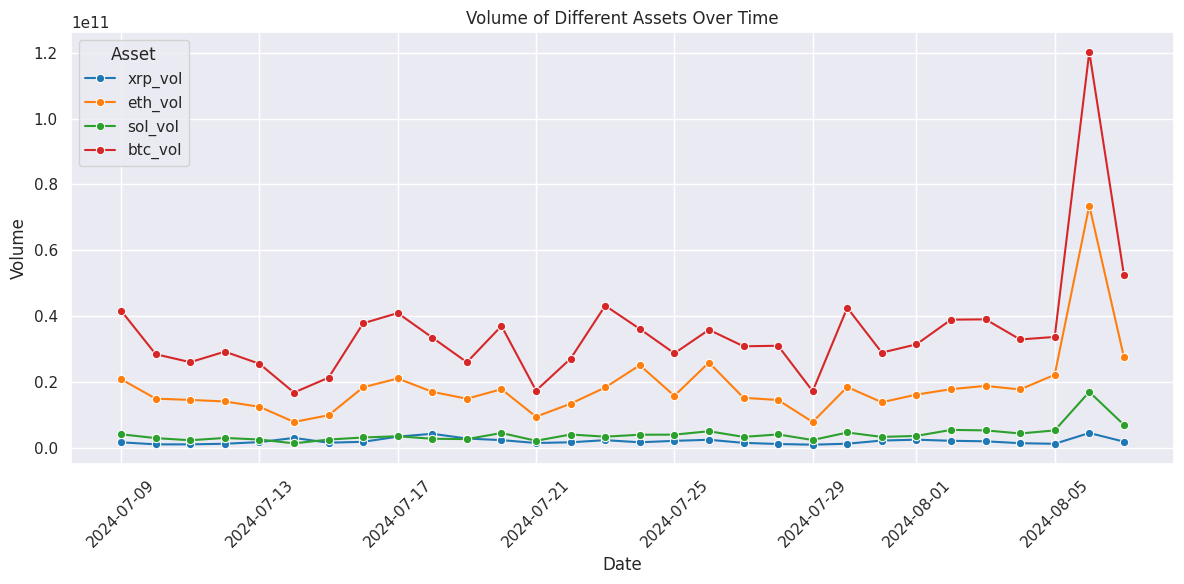

In [61]:
# Creating dataframes of all coins

# Loading Ethereum 30 Day data from Coingecko
data_eth = pd.read_excel("Ethereum_30day.xlsx")
data_eth.rename(columns = {"snapped_at":"Date", "price": "Price"}, inplace = True)
data_eth30 = pd.DataFrame(data_eth)
data_eth30['Date'] = pd.to_datetime(data_eth["Date"], format='%d-%m-%Y')


# Loading Bitcoin 30 Day data from Coingecko
data_btc = pd.read_excel("BTC_30day.xlsx")
data_btc.rename(columns = {"snapped_at":"Date", "price": "Price"}, inplace = True)
data_btc30 = pd.DataFrame(data_btc)
data_btc30['Date'] = pd.to_datetime(data_btc["Date"], format='%d-%m-%Y')


# Loading Solana 30 Day data from Coingecko
data_sol = pd.read_excel("Sol_30-day.xlsx")
data_sol.rename(columns = {"snapped_at":"Date", "price": "Price"}, inplace = True)
data_sol30 = pd.DataFrame(data_sol)
data_sol30['Date'] = pd.to_datetime(data_sol["Date"], format='%d-%m-%Y')

# Creating a trading volume data
eth_vol = data_eth30[["Date","total_volume"]].rename(columns= {"total_volume":"eth_vol"})
btc_vol = data_btc30[["total_volume"]].rename(columns = {"total_volume":"btc_vol"})
sol_vol = data_sol30[["total_volume"]].rename(columns= {"total_volume":"sol_vol"})
xrp_vol = data_30day[["total_volume"]].rename(columns= {"total_volume":"xrp_vol"})
xrp_vol.reset_index(drop=True, inplace=True)

#Creating the final dataframe for all digital assets
combined_vol = pd.concat([eth_vol, btc_vol, sol_vol, xrp_vol], axis=1)

melted_df = pd.melt(combined_vol, id_vars=['Date'], value_vars=['xrp_vol', 'eth_vol', 'sol_vol', 'btc_vol'],
                    var_name='Asset', value_name='Volume')
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='Date', y='Volume', hue='Asset', palette='tab10', marker='o')
plt.title('Volume of Different Assets Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(title='Asset')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



# **Analysis:**

As illustrated in the graph, trading volumes for major digital assets have shown similar trends over the past 30 days. Notably, **Bitcoin** has generated the **highest trading volume**, whereas **XRP** has demonstrated the **least volume** among the four assets, indicating relatively lower liquidity for XRP.

c. Volume by Venues
- *We will create simulated 30-day trading volume data for various exchanges and analyze the distribution of this volume across different venues*

In [69]:
# First Quartile of the trading volume

data_30day['total_volume'].quantile(0.25)

1392313276.5

In [71]:
# Third Quartile of the trading volume

data_30day['total_volume'].quantile(0.75)

2305116124.0

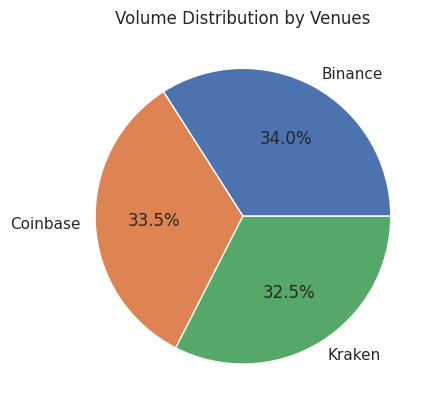

In [81]:
from datetime import datetime, timedelta
days_total = 30
venues = ['Binance', 'Coinbase', 'Kraken']

# Generate date range
dates = data_eth30["Date"] # Selecting the date range of 30 days as done earlier

# Generate random volume data
np.random.seed(2)  # For reproducibility
Venue_data = {
    'Date': [],
    'Venue': [],
    'Volume': []
}

for venue in venues:
    volumes = np.random.randint(1392313276.5, 2305116124.0, size=num_days)  # Random volume between first & third quartile of trading volume
    Venue_data['Date'].extend(dates)
    Venue_data['Venue'].extend([venue] * num_days)
    Venue_data['Volume'].extend(volumes)

Venue_df = pd.DataFrame(Venue_data)
total_volume_venue = Venue_df.groupby(['Venue'])['Volume'].sum().reset_index()

plt.pie(total_volume_venue['Volume'], labels=total_volume_venue['Venue'], autopct='%1.1f%%')
plt.title('Volume Distribution by Venues')
plt.show()


# **Summary:**

***The liquidity profile of XRP demonstrates that its trading volumes are heavily influenced by market sentiment and price fluctuations. Over the past 30 days, XRP has maintained a stable bid-ask spread. The asset is predominantly traded on Binance, which accounts for 34% of its total trading volume. Compared to other major digital assets, XRP shows lower overall liquidity, with trading activity mainly concentrated between the 0.57 and 0.61 price range. Additionally, XRP has experienced significant price volatility, driven by market reactions to regulatory concerns.***

---X-----------------------------------------------------------------X

**A more in-depth analysis could explore participation indicators, slippage and the average values of trades executed across multiple exchanges. However, due to limited access to these comprehensive resources, my research is constrained to the available data.**

---X-----------------------------------------------------------------X

**6. UPCOMING EXCITING PROJECTS**

While I do not follow the markets on a daily basis, some of the eye-catching projects for me have been:

**1. Berachain:** This is launched by the famous community "Bong Smoking Bears", a group with a shared interest in cannabis & blokchain technology. This unique group recently raised over $100 Million for their Layer 1 Blockchain project which will support dapps and smart contracts. I like the project due to its unique branding and community-centric model involving contributions from its supporters through governance, development and promotional activities.

**2. Ferrari's Crypto Expansion:** One of my favorite car brands, Ferrari, recently made headlines by introducing cryptocurrency payment options for its vehicles in the U.S. last October. Now, they are set to expand this innovative payment method to Europe by the end of July. Partnering with BitPay in US, Ferrari, known for its strong commitment to tradition, is making a bold leap into the future. This move showcases the growing awareness and expansion of digital assets even within orthodox brands.



References:
1. https://ripple.com/xrp/
2. https://www.coingecko.com/en/coins/xrp/historical_data
3. https://www.coindesk.com/markets/2023/07/13/ripples-xrp-token-surges-28-after-court-rules-xrp-sales-arent-investment-contracts/
4. https://coincodex.com/crypto/ripple/exchanges/
5. https://www.theblock.co/post/310233/the-scoop-berachain
6. https://www.theblock.co/post/307173/ferrari-crypto-payments-europe
